In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load the Airbnb dataset
data = pd.read_csv("Abnb_paris.csv")

# Drop rows with missing values
data.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Map numerical values to categorical labels for the 'sentiment' column
threshold = 2.5  # Adjust threshold as needed
data['sentiment'] = np.where(data['sentiment'] >= threshold, 'positive', 'negative')

# Data preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in string.punctuation]
    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'review_text' column
data['review'] = data['review_text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Base models
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear')
}

# Train base models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Ensemble methods
ensemble_models = [
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Voting Classifier", VotingClassifier(estimators=[('nb', models['Naive Bayes']),
                                                        ('dt', models['Decision Tree']),
                                                        ('svm', models['SVM'])], voting='hard'))
]

# Train ensemble models
for name, model in ensemble_models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Visualization (optional)
# Implement code to visualize performance metrics


Naive Bayes Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84        10
    positive       0.60      0.75      0.67         4

    accuracy                           0.79        14
   macro avg       0.74      0.78      0.75        14
weighted avg       0.81      0.79      0.79        14

Confusion Matrix:
[[8 2]
 [1 3]]

Decision Tree Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

    negative       0.88      0.70      0.78        10
    positive       0.50      0.75      0.60         4

    accuracy                           0.71        14
   macro avg       0.69      0.72      0.69        14
weighted avg       0.77      0.71      0.73        14

Confusion Matrix:
[[7 3]
 [1 3]]

SVM Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

    negative       1.00      0.70      0.82        10
    positive       0.57      1.00      0.73         

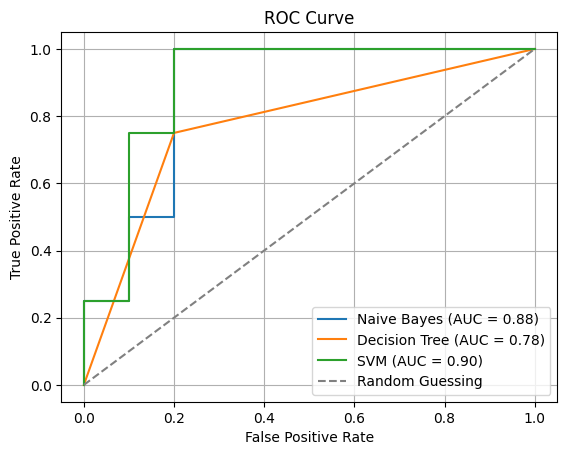

In [3]:
# Encode labels as numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Train base models and ensemble methods
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_tfidf)[:, 1]  # Probability of positive class
    else:
        y_scores = model.decision_function(X_test_tfidf)  # Use decision function scores for SVM
        # Convert decision function scores to probability estimates
        y_scores = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
    fpr, tpr, _ = roc_curve(y_test_encoded, y_scores)
    auc = roc_auc_score(y_test_encoded, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

1. **Improving User Experience:**
 - Personalized property recommendations based on reviews.
 - Review sentiment offers deeper insights, more than just numerical ratings. It also tells other aspects which may include the quality of service and the overall experience.
 - ML models can also include sentiment and summary-rating values for better profit predictions.
 - Correlating sentiment with revenue to determine predictive power.



2. **Region-Specific Strategy:**
 - Implementing area-specific strategies for Miami and Paris to leverage distinct market attributes and preferences.
 - Analyzing property performance metrics like reviews, occupancy rates, and pricing trends to understand demand dynamics and competition in each market.
 - Developing tailored pricing strategies: dynamic pricing for high-demand markets like Paris, and promotional offers for lower-demand periods in Miami.
 - Recommending ways for hosts to enhance earnings beyond pricing, such as improving amenities and listing descriptions or offering unique experiences.
 - Utilizing data-driven insights to improve competitiveness and enhance the experience for hosts and guests across different markets.